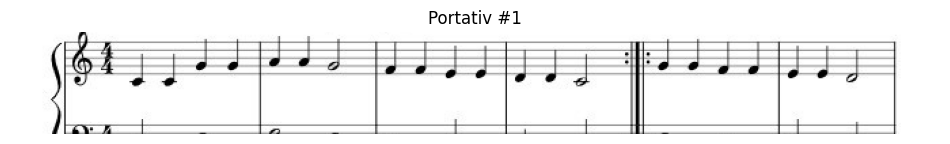

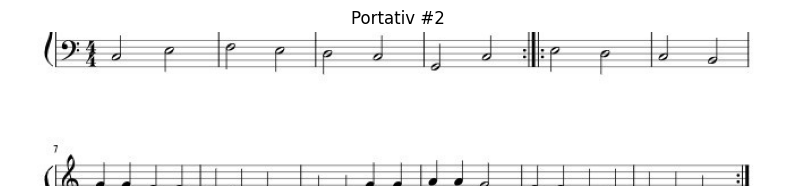

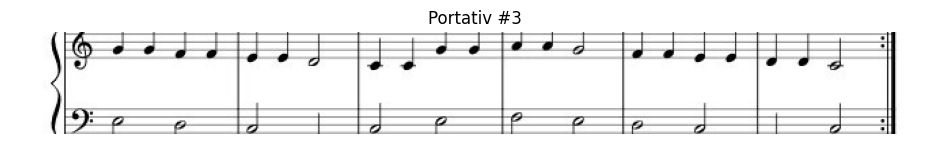

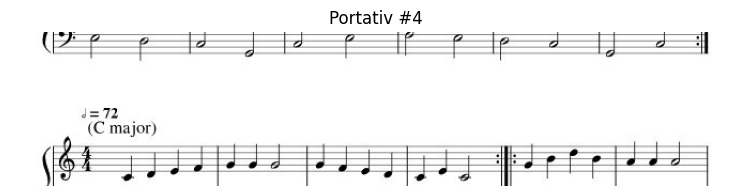

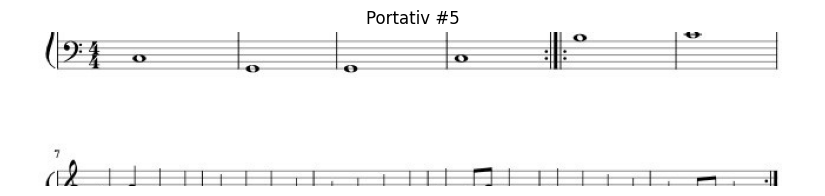

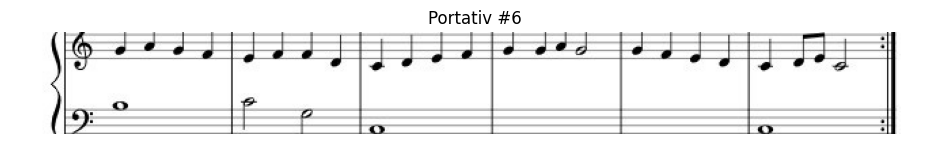

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_and_display_staff_lines(image_path):
    # 1. Încarcă imaginea
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Nu s-a putut încărca imaginea: {image_path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. Binarizare inversă
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 3. Proiecție orizontală pentru a detecta rânduri de portativ
    projection = np.sum(binary, axis=1)
    line_threshold = 0.5 * np.max(projection)
    staff_line_indices = np.where(projection > line_threshold)[0]

    # 4. Grupare de linii apropiate
    grouped = []
    current = []

    for y in staff_line_indices:
        if not current or y - current[-1] <= 2:  # Distanță mică între linii
            current.append(y)
        else:
            grouped.append(current)
            current = [y]
    if current:
        grouped.append(current)

    # 5. Media fiecărei linii
    staff_lines_y = [int(np.mean(group)) for group in grouped]

    # 6. Grupăm în portative (5 linii fiecare)
    systems = []
    temp = []
    for y in staff_lines_y:
        temp.append(y)
        if len(temp) == 5:
            systems.append(temp)
            temp = []

    # 7. Ajustăm marginea sus-jos pentru a include tot portativul (fără a tăia note)
    extended_systems = []
    for system in systems:
        # Calculăm marja suplimentară pentru fiecare linie de portativ
        top_margin = int(np.mean(np.diff(system)) // 2)  # Se adaugă un pic de spațiu sus
        bottom_margin = int(np.mean(np.diff(system)) // 2)  # Se adaugă un pic de spațiu jos
        top = max(min(system) - top_margin, 0)
        bottom = min(max(system) + bottom_margin, img.shape[0])
        extended_systems.append((top, bottom))

    # 8. Afișare fiecare portativ
    for idx, (top, bottom) in enumerate(extended_systems):
        cropped = img[top:bottom, :]

        # Afișare
        cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 2))
        plt.imshow(cropped_rgb)
        plt.title(f'Portativ #{idx + 1}')
        plt.axis('off')
        plt.show()

# Exemplu de rulare
extract_and_display_staff_lines("image.jpg")


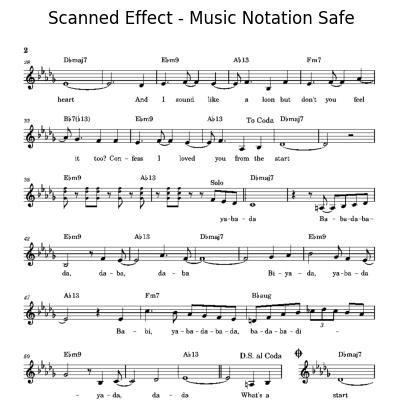

In [4]:
import cv2
import numpy as np
import copy
from matplotlib import pyplot as plt

def simulate_scan_preserving_music_details(image_path):
    # 1. Load image and make a deepcopy
    img = cv2.imread(image_path)
    img_copy = copy.deepcopy(img)

    # 2. Convert to grayscale
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # 3. Contrast stretch (manual normalization to 0-255 without clipping thin lines)
    min_val, max_val = np.percentile(gray, (0, 100))
    stretched = np.clip((gray - min_val) * 255.0 / (max_val - min_val + 1e-7), 0, 255).astype(np.uint8)

    # 4. Apply global threshold (Otsu) to preserve very thin dark lines
    _, thresh = cv2.threshold(stretched, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresh

# Exemplar de utilizare:
output = simulate_scan_preserving_music_details("./OMR/test3.png")

# Salvare
cv2.imwrite("scanned_like_output.png", output)

# Afișare (opțional)
plt.imshow(output, cmap='gray')
plt.title("Scanned Effect - Music Notation Safe")
plt.axis('off')
plt.show()


Easy Piano Pieces

Charley Shi
1=60
Twinkle Twinkle Little Star (C major)

4 4 e a Fag eed ==:

[D4 = a ee —-

4572
(C major)

Ss —— =

7
9

O00 es, digeee teae
[a =

> >



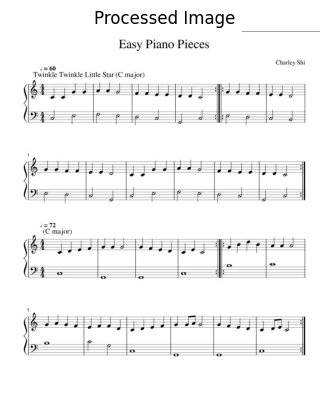

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("image.jpg", 0)

text = pytesseract.image_to_string(img, config='--psm 4')
print(text)
# Display the image using matplotlib
plt.imshow(img, cmap='gray')
plt.title("Processed Image")
plt.axis('off')
plt.show()
